In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statistics import mean
import pandas.io.formats.format as pf
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Number of rows and number of columns

In [5]:
print(f"Number of rows : {data.shape[0]}")
print(f"Number of columns : {data.shape[1]}")

Number of rows : 48842
Number of columns : 15


# Check info summary

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


DataFrame has 15 columns                                                          
6 columns are (int64 Dtype) and 9 columns are (object Dtype)                                              
Some columns have value as '?'                                                                                        
Let's find out how many columns have '?'                                                                    

In [7]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

'workclass' column has 2799 '?'                                                               
'occupation' column has 2809 '?'                                                                
'native-country' column has 857 '?'                                                    
We will convert '?' into NaN                                         

In [8]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

In [9]:
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Successfully converted "?" into NaN.

# Check null values

In [10]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

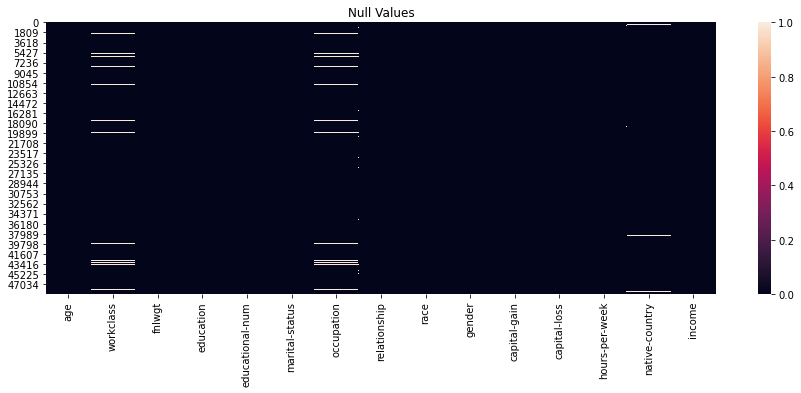

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isna())
plt.title('Null Values')
plt.show()

Now we have,                                    
2799 - 5.73 % null values in 'workclass' column                              
2809 - 5.75 %null values in 'occupation' column                                    
457 - 1.75 % null values in 'native-country' column                                          
                                           

In [13]:
data = data.fillna(data.mode().iloc[0])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [14]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Successfully replaced all the null values.

# Check for duplicate values

In [15]:
print(f"We have {data.duplicated().sum()} duplicate values")

We have 53 duplicate values


In [16]:
# Drop duplicate values¶

In [17]:
data = data.drop_duplicates()

print(f"After dropping duplicate values, now we have {data.duplicated().sum()} duplicate values")

After dropping duplicate values, now we have 0 duplicate values


# Check descriptive statistics - Numerical columns

In [18]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48789.000000,4.878900e+04,48789.000000,48789.000000,48789.000000,48789.000000
mean,38.653139,1.896697e+05,10.078809,1080.239829,87.597368,40.425895
std,13.708426,1.056182e+05,2.570072,7455.980728,403.213066,12.392856
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376080e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Check descriptive statistics - Categorical columns

In [19]:
data.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48789,48789,48789,48789,48789,48789,48789,48789,48789
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36654,15770,22366,8969,19703,41713,32614,44647,37108


Check 'education' & 'educational-num' columns

In [20]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [21]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

As we can see, 'education' & 'educational-num' both columns have similer values               
'education' has string values               
'educational-num' has numerical values                         
all HS-grad from education represents 9 in education-num                          
all Masters from education represents 14 in education-num and likewise.                          
Both columns conveying same information                                        
So, we can remove 'education-num' column                                                               

Drop education-num column

In [22]:
data.drop(['educational-num'], axis=1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We have successfully dropped [ 'education-num' ] column.

Drop capital-gain, and capital-loss columns

As we can see in 'descriptive statistics - Numerical columns',                        
[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00                                
So, we can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns                                        

In [23]:
data.drop(['capital-gain', 'capital-loss'], axis=1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


We have successfully dropped [ 'capital-gain' ] & [ 'capital-loss' ] both columns.

# Univariate Analysis

The Distribution of Age Column

In [24]:
data['age'].describe()

count    48789.000000
mean        38.653139
std         13.708426
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

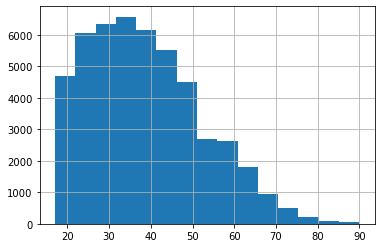

In [25]:
data['age'].hist(bins=15)

As per above histogram .describe method,                               
[ 'age' ] column has 25 % below age 28                                      
[ 'age' ] column has 50 % below age 37                                  
[ 'age' ] column has 75 % below age 47                                  
Most of the age values are between 17 to 50                                                        

Total number of people having age between 17 To 50 (Inclusive)

In [26]:
print(f"Total number of people having age between 17 To 50 : {len(data[data['age'].between(17,50)])}")

Total number of people having age between 17 To 50 : 38982


The distribution of workclass column

In [27]:
data['workclass'].describe()

count       48789
unique          8
top       Private
freq        36654
Name: workclass, dtype: object

<AxesSubplot:>

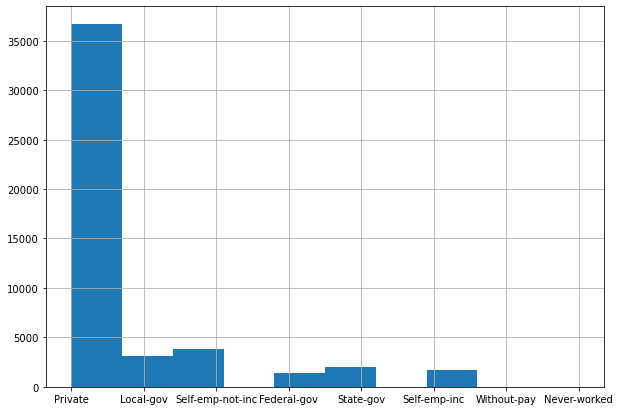

In [28]:
plt.figure(figsize=(10,7))
data['workclass'].hist()

Most of the employees are from 'Private' sector

People have bachelors and masters degree

In [29]:
print(f"{len(data[data['education'].isin(['Bachelors', 'Masters'])])} : people have bachelors and masters degree")

10669 : people have bachelors and masters degree


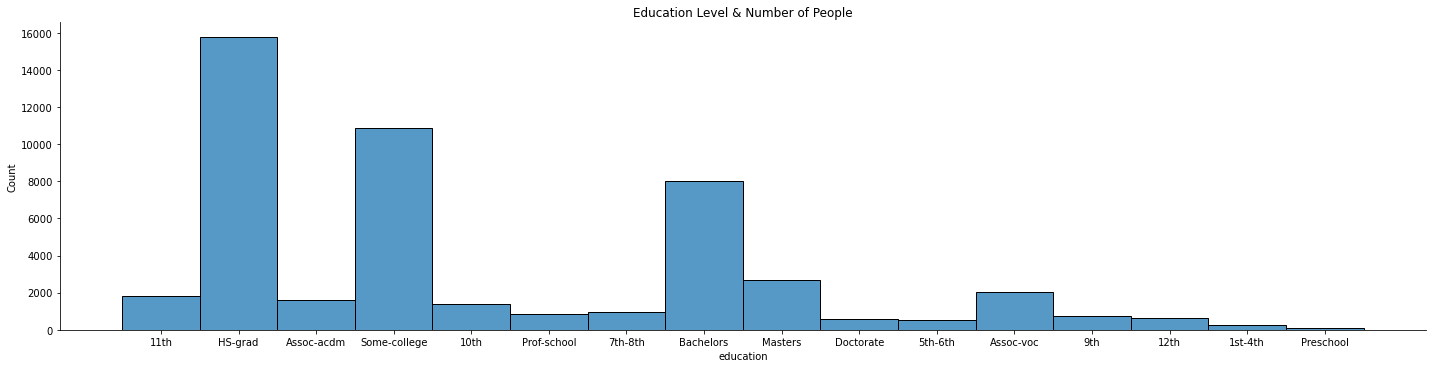

In [30]:
sns.displot(x=data['education'], aspect=4)
plt.title('Education Level & Number of People')
plt.show()

# Bivariate Analysis

Relationship between Income and Age

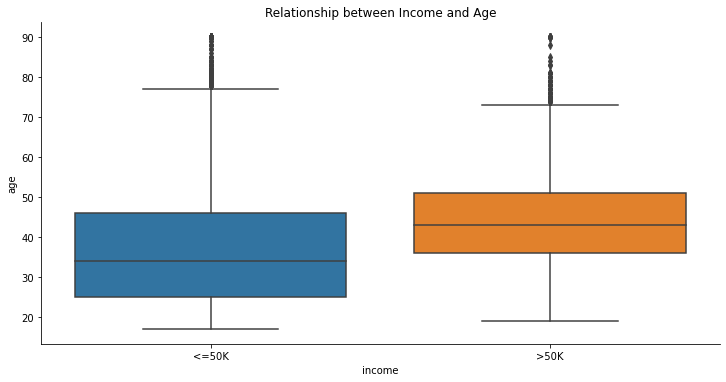

In [31]:
sns.catplot(data=data, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()

Most of the people having income less than or equal to 50K are between age 25-45                               
Most of the people having income more than 50K are between age 37-50                                               

In [32]:
numerical_subset = data.select_dtypes(include=['int64', 'float64'])

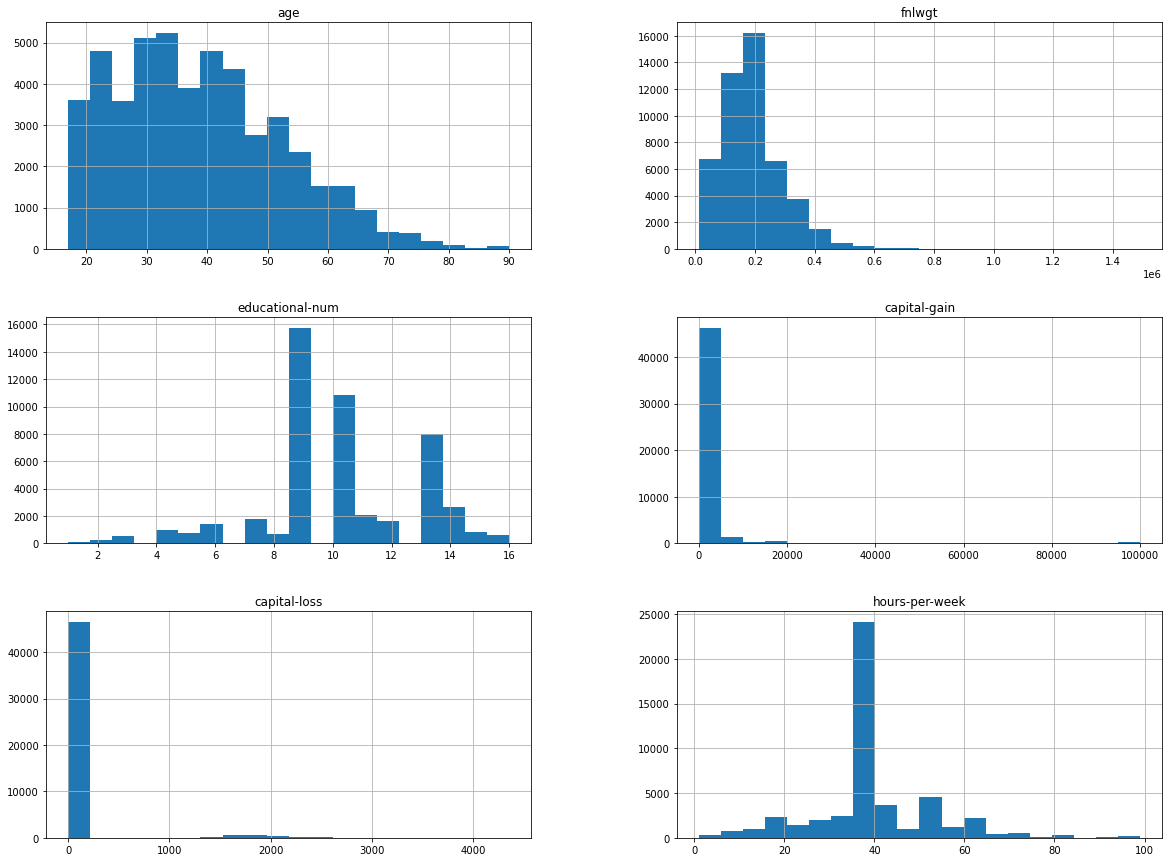

In [33]:
import matplotlib.pyplot as plt
numerical_subset.hist(bins=20, figsize=(20, 15))
plt.show()

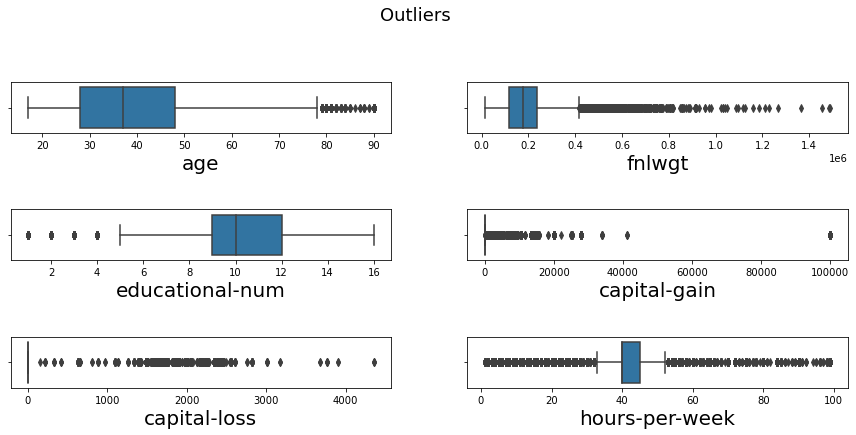

In [34]:
plt.figure(figsize=(15,15))
plt.suptitle("Outliers", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=1.5)

for x in enumerate(numerical_subset):
    plt.subplot(7,2,x[0]+1)
    sns.boxplot(data[x[1]])
    plt.xlabel(x[1],fontsize=20)

# PRE PROCESSING

# Outlier handling

In [35]:
print(f"There's {data[data['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")
print(f"There's {data[data['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

There's 244 outlier in the capital-gain column
There's 137 outlier in the hours-per-week column


In [36]:
data['capital-gain'].replace(99999, np.mean(data['capital-gain'].values), inplace=True)
data['hours-per-week'].replace(99, np.mean(data['hours-per-week'].values), inplace=True)
print(data.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48789.000000  4.878900e+04     48789.000000  48789.000000   
mean      38.653139  1.896697e+05        10.078809    585.534516   
std       13.708426  1.056182e+05         2.570072   2531.851316   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175550e+05         9.000000      0.000000   
50%       37.000000  1.781400e+05        10.000000      0.000000   
75%       48.000000  2.376080e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  41310.000000   

       capital-loss  hours-per-week  
count  48789.000000    48789.000000  
mean      87.597368       40.261419  
std      403.213066       11.996731  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       98.000000  


In [37]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0,40.0,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0,30.0,United-States,<=50K


# Introducing two new columns

In [38]:
data['net_capital'] = (data['capital-gain'] - data['capital-loss']).astype(int)

In [39]:
data['per-hour-income'] = (data['net_capital'] / (data['hours-per-week'] * 52)).astype(int)

In [40]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net_capital,per-hour-income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40.0,United-States,<=50K,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50.0,United-States,<=50K,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40.0,United-States,>50K,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0,40.0,United-States,>50K,7688,3
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0,30.0,United-States,<=50K,0,0


In [41]:
data['per-hour-income'].describe()

count    48789.000000
mean         0.240771
std          2.071371
min        -37.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        218.000000
Name: per-hour-income, dtype: float64

# Label encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country', 'income']

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Splitting the data for modelling

In [43]:
y = data['income']
X = data.drop('income', axis = 1)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.33)

# Standard Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

num_cols = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'net_capital', 'per-hour-income']

for col in num_cols:
    f = pd.Series(data[col])
    arr = f.values
    arr = arr.reshape(-1, 1)
    data[col] = sc.fit_transform(arr)

In [46]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net_capital,per-hour-income
0,-0.995977,3,0.351575,1,-1.197959,4,6,3,2,1,0.0,0,-0.021791,38,0,-0.192725,-0.116239
1,-0.047646,3,-0.945449,11,-0.419762,2,4,0,4,1,0.0,0,0.811778,38,0,-0.192725,-0.116239
2,-0.777131,1,1.394483,7,0.747532,2,10,0,4,1,0.0,0,-0.021791,38,1,-0.192725,-0.116239
3,0.390046,3,-0.277859,15,-0.030664,2,6,0,2,1,7688.0,0,-0.021791,38,1,2.782899,1.332092
4,-1.506617,3,-0.815897,15,-0.030664,4,9,3,4,0,0.0,0,-0.855360,38,0,-0.192725,-0.116239


# EVALUATING AND COMPARING DIFFERENT CLASSIFIERS

In [47]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier(learning_rate=0.56)
rf = RandomForestClassifier()
lg = LogisticRegression()
dt = DecisionTreeClassifier()
sgd = SGDClassifier()

gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_acc = round(accuracy_score(y_test, gbc_pred), 4)*100

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = round(accuracy_score(y_test, rf_pred), 4)*100

lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
lg_acc = round(accuracy_score(y_test, lg_pred), 4)*100

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = round(accuracy_score(y_test, dt_pred), 4)*100

sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_acc = round(accuracy_score(y_test, dt_pred), 4)*100

In [48]:
results = pd.DataFrame({
    'Model': ['Gradient Boosting Classifier', 'Random Forest Classifier',
             'Logistic Regression', 'Decision Tree Classifier', 'Stochastic Gradient Descent'],
    'Score': [gbc_acc, rf_acc, lg_acc, dt_acc, sgd_acc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df

,Model,Score
0,Gradient Boosting Classifier,87.08
1,Random Forest Classifier,85.55
3,Decision Tree Classifier,81.09
4,Stochastic Gradient Descent,81.09
2,Logistic Regression,78.54


Gradient Boosting Classifier is more accurate than others.

# Gradient Boosting Classifier

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test, gbc_pred))
print(confusion_matrix(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12294
           1       0.78      0.64      0.70      3807

    accuracy                           0.87     16101
   macro avg       0.83      0.79      0.81     16101
weighted avg       0.87      0.87      0.87     16101

[[11592   702]
 [ 1379  2428]]


In [51]:
from sklearn.metrics import plot_confusion_matrix

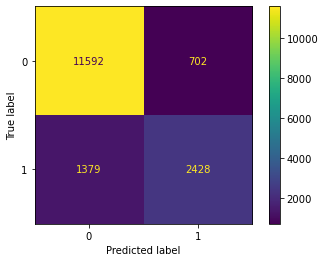

In [52]:
plot_confusion_matrix(gbc.fit(X_train, y_train),X_test,y_test)

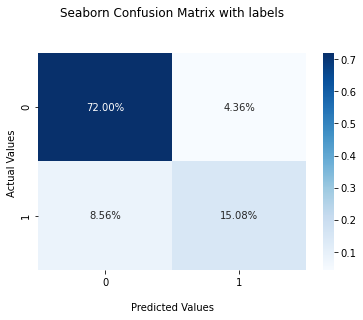

In [53]:
ax = sns.heatmap(confusion_matrix(y_test, gbc_pred)/np.sum(confusion_matrix(y_test, gbc_pred)), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

About 13% is wrongly predicted.

# Hyper parametric tuning(GridSearchCV)

In [54]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [55]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(learning_rate=0.56),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [56]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [57]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


0.759 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.759 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.801 + or -0.003 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.836 + or -0.006 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.759 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.799 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.852 + or -0.005 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.858 + or -0.005 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.759 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.807 + or -0.003 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.858 + or -0.004 for the {'learning_rate': 0.01, 'max_depth': 5

In [58]:
print(classification_report(y_test, gbc_pred))
print(confusion_matrix(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12294
           1       0.78      0.64      0.70      3807

    accuracy                           0.87     16101
   macro avg       0.83      0.79      0.81     16101
weighted avg       0.87      0.87      0.87     16101

[[11592   702]
 [ 1379  2428]]


In [59]:
cv_pred = cv.predict(X_test)

In [60]:
print(classification_report(y_test, cv_pred))
print(confusion_matrix(y_test, cv_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12294
           1       0.78      0.64      0.70      3807

    accuracy                           0.87     16101
   macro avg       0.84      0.79      0.81     16101
weighted avg       0.87      0.87      0.87     16101

[[11599   695]
 [ 1364  2443]]


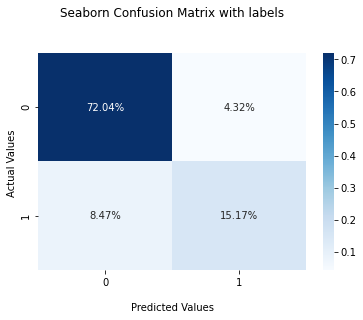

In [61]:
ax = sns.heatmap(confusion_matrix(y_test, cv_pred)/np.sum(confusion_matrix(y_test, cv_pred)), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()